In [41]:
DATE = "2021/06/02"

## MOUNT GOOGLE DRIVE TO COLAB

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## INSTALL ENVIROMENT

In [3]:
!python -m pip install rasterio gdal
!python -m pip install geopandas
!pip install paramiko


     |████████████████████████████████| 19.3 MB 5.3 MB/s 
     |████████████████████████████████| 994 kB 4.8 MB/s 
     |████████████████████████████████| 15.4 MB 36 kB/s 
     |████████████████████████████████| 6.6 MB 28.5 MB/s 
     |████████████████████████████████| 206 kB 5.3 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 961 kB 10.1 MB/s 
     |████████████████████████████████| 3.2 MB 21.0 MB/s 


### CONNECT TO ARBUTUS

In [42]:
import paramiko
k = paramiko.RSAKey.from_private_key_file("/content/drive/My Drive/CSC562/Key/id_rsa")
c = paramiko.SSHClient()
c.set_missing_host_key_policy(paramiko.AutoAddPolicy())
print ("connecting")
c.connect( hostname = "206.12.92.18", port = "10037", username = "ubuntu", pkey = k )
print ("connected")

connecting
connected


### LIST DATA IN ARBUTUS

In [7]:
from pathlib import Path
#command = "ls ~/project/data/S2B_MSIL1C_20180831T185909_N0206_R013_T10TET_20180831T225817.SAFE/GRANULE/L1C_T10TET_A007761_20180831T190533/IMG_DATA"
command = "find ~/project/data/MSI/Tofino/2021/ -type f -name *B04*10m.jp2 -o -name *B08*10m.jp2"
print ("Executing {}".format( command ))
stdin , stdout, stderr = c.exec_command(command)
#print (stdout.read().decode("utf-8"))
jp2files = (stdout.read().decode("utf-8")).split('\n')
print (jp2files)
print (stderr.read())


Executing find ~/project/data/MSI/Tofino/2021/ -type f -name *B04*10m.jp2 -o -name *B08*10m.jp2
['/home/ubuntu/project/data/MSI/Tofino/2021/07/09/S2B_MSIL2A_20210709T190919_N0301_R056_T09UYP_20210709T232137.SAFE/GRANULE/L2A_T09UYP_A022676_20210709T191400/IMG_DATA/R10m/T09UYP_20210709T190919_B04_10m.jp2', '/home/ubuntu/project/data/MSI/Tofino/2021/07/09/S2B_MSIL2A_20210709T190919_N0301_R056_T09UYP_20210709T232137.SAFE/GRANULE/L2A_T09UYP_A022676_20210709T191400/IMG_DATA/R10m/T09UYP_20210709T190919_B08_10m.jp2', '/home/ubuntu/project/data/MSI/Tofino/2021/07/09/S2B_MSIL2A_20210709T190919_N0301_R056_T10UCU_20210709T232137.SAFE/GRANULE/L2A_T10UCU_A022676_20210709T191400/IMG_DATA/R10m/T10UCU_20210709T190919_B08_10m.jp2', '/home/ubuntu/project/data/MSI/Tofino/2021/07/09/S2B_MSIL2A_20210709T190919_N0301_R056_T10UCU_20210709T232137.SAFE/GRANULE/L2A_T10UCU_A022676_20210709T191400/IMG_DATA/R10m/T10UCU_20210709T190919_B04_10m.jp2', '/home/ubuntu/project/data/MSI/Tofino/2021/07/09/S2B_MSIL2A_2021070

### IMPORTING DATA FROM ARBUTUS TO GOOGLE DRIVE (ALL DONE)

In [ ]:
import os
ftp_client=c.open_sftp()
print (len(jp2files))
for file in jp2files:
  if file != "":
    local_file = '/content/drive/My Drive/CSC562/Data/' + file.lstrip('/home/ubuntu/project/data/MSI/')
    local_path = '/'.join(local_file.split('/')[:-1])
    print (local_file) 
    Path(local_path).mkdir(parents=True, exist_ok=True)
    if not os.path.exists(local_file):
      ftp_client.get(file,local_file)

NameError: ignored

### ALL NEEDED DATA HAS BEEN IMPORTED TO GOOGLE DRIVE

In [43]:

import os
DATE = "2021/06/02"
file_dic = {}
for root, dirs, files in os.walk("/content/drive/My Drive/CSC562/Data/Tofino/" + DATE):
  path = root.split(os.sep)
  #print((len(path) - 1) * '---', os.path.basename(root))
  for file in files:
    if file.endswith('tif'):
      os.remove(root +'/'+ file)
      print('remove:' + root +'/'+ file)
    if not file.endswith('jp2'):
      continue
    if root in file_dic.keys():
      file_dic[root] = file_dic[root] + ";" + file
    else:
      file_dic[root] = file
print (file_dic)



{'/content/drive/My Drive/CSC562/Data/Tofino/2021/06/02/S2B_MSIL2A_20210602T191909_N0300_R099_T09UYQ_20210602T234234.SAFE/GRANULE/L2A_T09UYQ_A022147_20210602T192421/IMG_DATA/R10m': 'T09UYQ_20210602T191909_B04_10m.jp2;T09UYQ_20210602T191909_B08_10m.jp2', '/content/drive/My Drive/CSC562/Data/Tofino/2021/06/02/S2B_MSIL2A_20210602T191909_N0300_R099_T09UXQ_20210602T234234.SAFE/GRANULE/L2A_T09UXQ_A022147_20210602T192421/IMG_DATA/R10m': 'T09UXQ_20210602T191909_B08_10m.jp2;T09UXQ_20210602T191909_B04_10m.jp2'}


### Using ipyleaflet drawing tools to interact with Earth Engine data

In [4]:
# Installs geemap package
import subprocess

try:
    import geemap.foliumap as geemap
except ImportError:
    print('geemap package not installed. Installing ...')
    subprocess.check_call(["python", '-m', 'pip', 'install', '-U', 'geemap'])

In [45]:
#import csv files 
for root, dirs, files in os.walk("/content/drive/My Drive/CSC562/Data/Tofino/"):
  path = root.split(os.sep)
  #print((len(path) - 1) * '---', os.path.basename(root))
  for file in files:
    if file.endswith('csv'):
      csvfile = root + file
df = geemap.csv_to_pandas(csvfile)
df



,DATE (YYYY-MM-DD),TEMP (degree_Celsius),LATITUDE (degree_north),LONGITUDE (degree_east)
0,2020-07-01,13.2,49.168295,-125.949535
1,2020-07-02,13.8,49.168295,-125.949535
2,2020-07-03,13.8,49.168295,-125.949535
3,2020-07-04,14.0,49.168295,-125.949535
4,2020-07-05,14.3,49.168295,-125.949535
...,...,...,...,...
359,2021-06-25,12.6,49.168295,-125.949535
360,2021-06-26,13.7,49.168295,-125.949535
361,2021-06-27,12.7,49.168295,-125.949535
362,2021-06-28,13.4,49.168295,-125.949535


In [63]:
import geemap
import ee
from ipyleaflet import *
from ipywidgets import Label

center=[49.531713, -126.123053]
zoom=8

x=-125.9495351
y=49.1682948

Map = geemap.Map(center=center, zoom=zoom, toolbar_ctrl=True, layer_ctrl=True)

palette = [
    'FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718', '74A901',
    '66A000', '529400', '3E8601', '207401', '056201', '004C00', '023B01',
    '012E01', '011D01', '011301']

Map.add_basemap('Esri Ocean') # Add Google Satellite


points = ee.Geometry.MultiPoint([-125.949535, 49.168295, -125.9644, 49.1715, -126.1859, 49.2483, -125.9044, 49.1132])
vis_params = {'color': 'red'}


Map.add_layer(points, vis_params, 'Sensors')
Map

#Map.add_xy_data(csvfile, x=x, y=y, label=None, layer_name='Sensor', to_ee=False)


### Sequential Computation

T09UYQ_20210602T191909_B04_10m.jp2
T09UYQ_20210602T191909_B08_10m.jp2


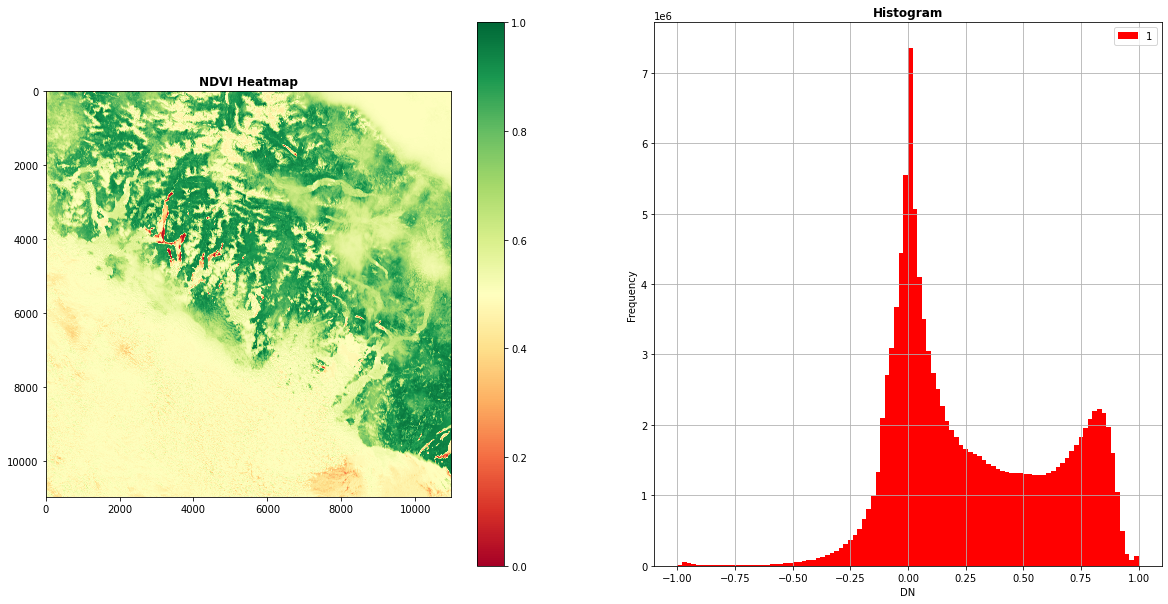

/content/drive/My Drive/CSC562/Data/Tofino/2021/06/02/S2B_MSIL2A_20210602T191909_N0300_R099_T09UYQ_20210602T234234.SAFE/GRANULE/L2A_T09UYQ_A022147_20210602T192421/IMG_DATA/R10m/ndvi.tif
/home/ubuntu/project/data/MSI/Tofino/2021/06/02/S2B_MSIL2A_20210602T191909_N0300_R099_T09UYQ_20210602T234234.SAFE/GRANULE/L2A_T09UYQ_A022147_20210602T192421/IMG_DATA/R10m/ndvi.tif
T09UXQ_20210602T191909_B08_10m.jp2
T09UXQ_20210602T191909_B04_10m.jp2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide


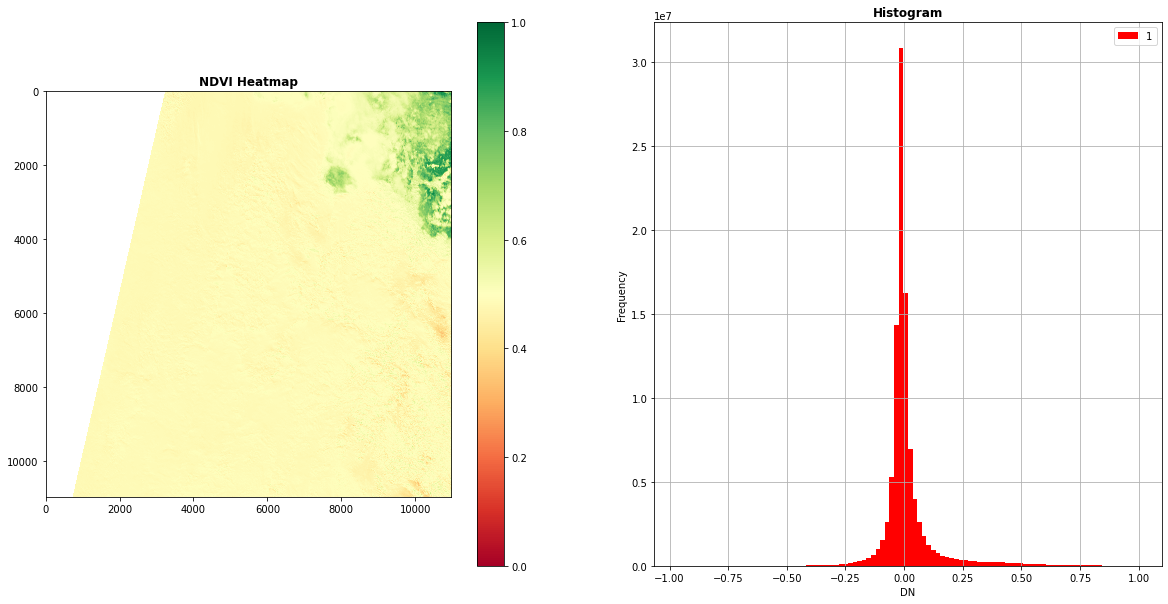

/content/drive/My Drive/CSC562/Data/Tofino/2021/06/02/S2B_MSIL2A_20210602T191909_N0300_R099_T09UXQ_20210602T234234.SAFE/GRANULE/L2A_T09UXQ_A022147_20210602T192421/IMG_DATA/R10m/ndvi.tif
/home/ubuntu/project/data/MSI/Tofino/2021/06/02/S2B_MSIL2A_20210602T191909_N0300_R099_T09UXQ_20210602T234234.SAFE/GRANULE/L2A_T09UXQ_A022147_20210602T192421/IMG_DATA/R10m/ndvi.tif

Total calculation time 243.60 s


In [48]:
import time
import rasterio
from matplotlib import cm
import matplotlib.pyplot as plt
from rasterio.plot import show_hist, show
import numpy as np
ftp_client=c.open_sftp()

start = time.time()

for key in file_dic.keys():
  #print(key)
  b4_b8 = file_dic[key].split(';')
  #print (b4_b8)
  b4 = ''
  b8 = ''
  for band in b4_b8:
    print (band)
    if 'B04' in band:
      b4 = key + '/' + band
    elif 'B08' in band:
      b8 = key + '/' + band

  #print (b4)
  #print (b8)

  outfile = key + '/ndvi.tif'

  #if os.path.exists(outfile):
    #os.remove(outfile)

  with rasterio.open(b4) as red:
    RED = red.read()
  with rasterio.open(b8) as nir:
    NIR = nir.read()

  #compute the ndvi

  ndvi = (NIR.astype(float) - RED.astype(float)) / (NIR+RED)

  color_map = 'RdYlGn'

  # Plot NDVI and histogram
  
  fig, (ax_ndvi, ax_hist) = plt.subplots(1, 2, figsize=(20,10))
  show(ndvi, ax=ax_ndvi, title='NDVI Heatmap', cmap=color_map)
  fig.colorbar(cm.ScalarMappable(cmap=color_map), ax=ax_ndvi)
  show_hist(ndvi, bins=100, ax=ax_hist)
  plt.show()


  profile = red.meta
  profile.update(driver='GTiff')
  profile.update(dtype=rasterio.float32)

  with rasterio.open(outfile, 'w', **profile) as dst:
    dst.write(ndvi.astype(rasterio.float32))

  print(outfile)
  remotefile = '/home/ubuntu/project/data/MSI/' + outfile.lstrip('/content/drive/My Drive/CSC562/Data/')
  print (remotefile)
  #ftp_client.put(outfile, remotefile)
  #os.remove(b4)
  #os.remove(b8)

end = time.time()
print(f"\nTotal calculation time {end - start:.2f} s")

### Paralle Computation

In [ ]:
import time
import threading
start = time.time()

def calculation(b4_b8):
  #start = time.time()
  #print('Processing {} '.format(b4_b8))
  b4 = ''
  b8 = ''
  for band in b4_b8:
    if 'B04' in band:
      b4 = key + '/' + band
    elif 'B08' in band:
      b8 = key + '/' + band

  outfile = key + '/ndvi.tif'
  print(outfile)

  if os.path.exists(outfile):
    os.remove(outfile)
  print('start reading {} '.format(b4_b8))
  with rasterio.open(b4) as red:
    RED = red.read()
  with rasterio.open(b8) as nir:
    NIR = nir.read()

  #compute the ndvi
  print('finish reading {}, start computation '.format(b4_b8))  
  ndvi = (NIR.astype(float) - RED.astype(float)) / (NIR+RED)
  new_ndvi = np.where(ndvi >= 0.4, ndvi, 0)
  
  print('finish computation {} '.format(b4_b8))    
  profile = red.meta
  profile.update(driver='GTiff')
  profile.update(dtype=rasterio.float32)

  with rasterio.open(outfile, 'w', **profile) as dst:
    dst.write(new_ndvi.astype(rasterio.float32))

  end = time.time()
  print("\ calculation time {end - start:.2f} s")
  remotefile = '/home/ubuntu/project/data/MSI/' + outfile.lstrip('/content/drive/My Drive/CSC562/Data/')

jobs = []
for key in file_dic.keys():
  #print(key)
  b4_b8 = file_dic[key].split(';')
  t = threading.Thread(target=calculation, args=(b4_b8,))
  jobs.append(t)
  t.start()

for job in jobs:
  job.join()
end = time.time()
print(f"\ calculation time {end - start:.2f} s")
print('*** All jobs finished ***')
  #print (remotefile)
  #ftp_client.put(outfile, remotefile)
  #os.remove(b4)
  #os.remove(b8)
#end = time.time()


### SHOW THE RESULT

/content/drive/My Drive/CSC562/Data/Tofino/2021/06/02/S2B_MSIL2A_20210602T191909_N0300_R099_T09UYQ_20210602T234234.SAFE/GRANULE/L2A_T09UYQ_A022147_20210602T192421/IMG_DATA/R10m/ndvi.tif


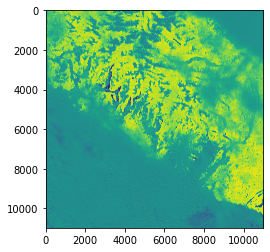

/content/drive/My Drive/CSC562/Data/Tofino/2021/06/02/S2B_MSIL2A_20210602T191909_N0300_R099_T09UXQ_20210602T234234.SAFE/GRANULE/L2A_T09UXQ_A022147_20210602T192421/IMG_DATA/R10m/ndvi.tif


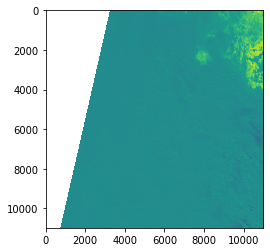

In [ ]:
import os
for root, dirs, files in os.walk("/content/drive/My Drive/CSC562/Data/"):
  path = root.split(os.sep)
  #print((len(path) - 1) * '---', os.path.basename(root))
  for file in files:   
    if file.endswith('tif'):
      print(root + '/' + file)
      dataset = rasterio.open(root + '/' + file)
      image = dataset.read(1)
      plt.imshow(image)
      plt.show()
     
